In [6]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data analysis

In [4]:
#Vérifier les valeurs nuls par colonne
for c in df.columns: 
    print(f"Missing values for {c}: {df[c].isnull().sum()}")

Missing values for Pregnancies: 0
Missing values for Glucose: 0
Missing values for BloodPressure: 0
Missing values for SkinThickness: 0
Missing values for Insulin: 0
Missing values for BMI: 0
Missing values for DiabetesPedigreeFunction: 0
Missing values for Age: 0
Missing values for Outcome: 0


In [34]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: title={'center': 'Correlation Matrix'}>

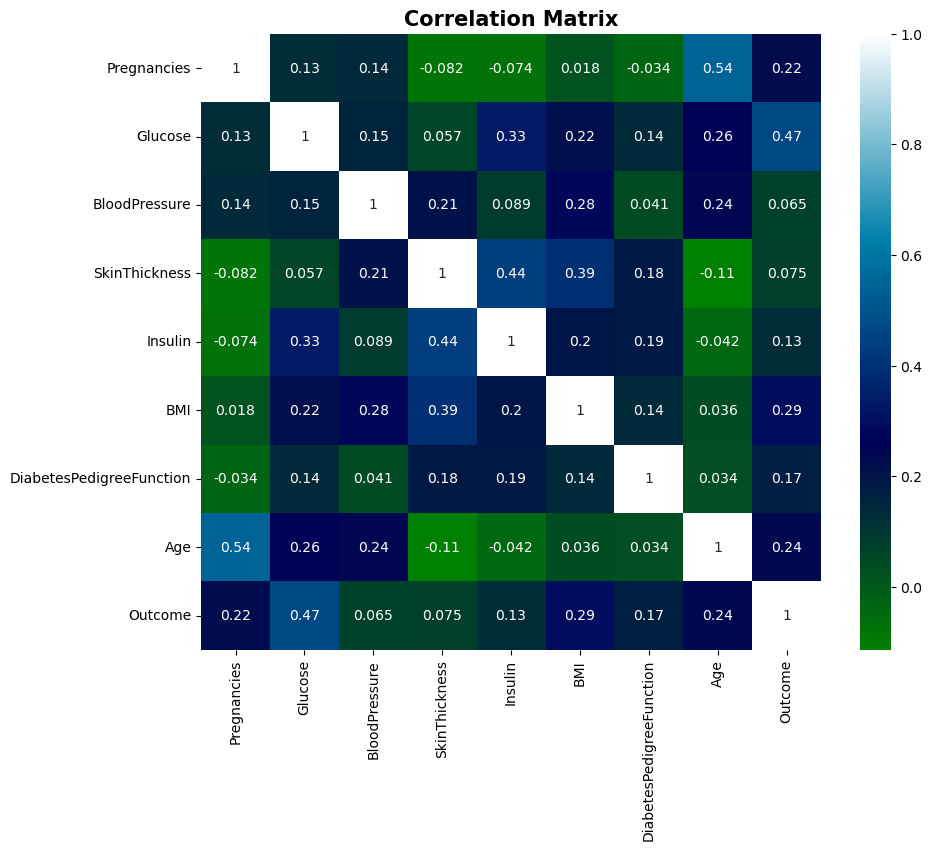

In [7]:
plt.figure(figsize=(10,8), edgecolor="black")
plt.title("Correlation Matrix", color="black", fontweight='bold',
         fontsize=15)
corr = df.corr()
sns.heatmap(corr, cmap ='ocean', annot=True, cbar=True)

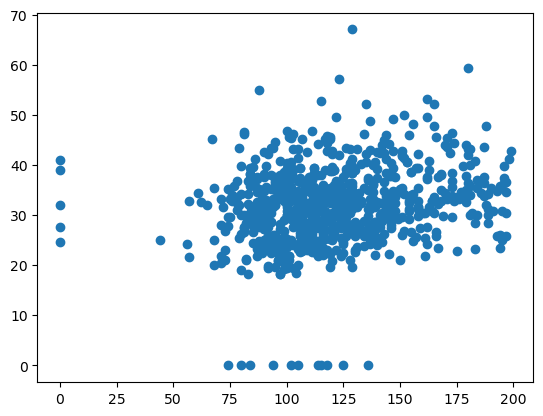

In [25]:
plt.scatter(x='Glucose',y='BMI',data=df)
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


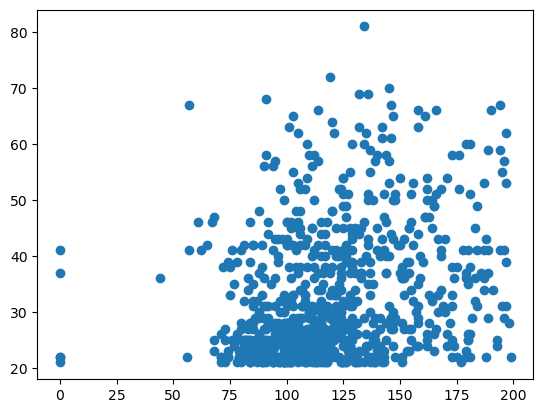

In [28]:
plt.scatter(x='Glucose',y='Age',data=df)
plt.show()

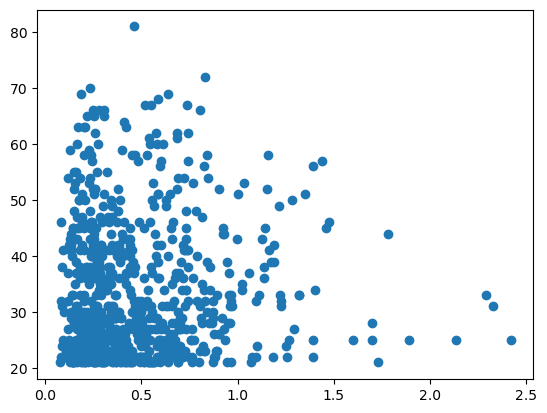

In [29]:
plt.scatter(x='DiabetesPedigreeFunction',y='Age',data=df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error 

In [9]:
X = df.drop(columns=['Outcome'], axis=1)
y = df.Outcome      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   shuffle=True)


In [10]:
X = df.drop(columns=['Outcome'], axis=1)
y = df.Outcome      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   shuffle=True)

print("Dimension of X_train is :" + str(X_train.shape))
print("Dimension of X_test is :" + str(X_test.shape))
print("Dimension of y_train is :" + str(y_train.shape))
print("Dimension of y_test is :" + str(y_test.shape))

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
log_reg.predict_proba(X_test)[:10] #
df_proba = pd.DataFrame({"Actual": y_test, "Predicted":log_reg.predict(X_test)}).head(10) 
df_proba
mean_squared_error(y_test,log_reg.predict(X_test))

Dimension of X_train is :(614, 8)
Dimension of X_test is :(154, 8)
Dimension of y_train is :(614,)
Dimension of y_test is :(154,)


/home/syscom/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2532467532467532

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,log_)

In [18]:

target_names = ["Safe","Diabete"]
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Safe       0.81      0.79      0.80        99
     Diabete       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Text(50.722222222222214, 0.5, 'Actual label')

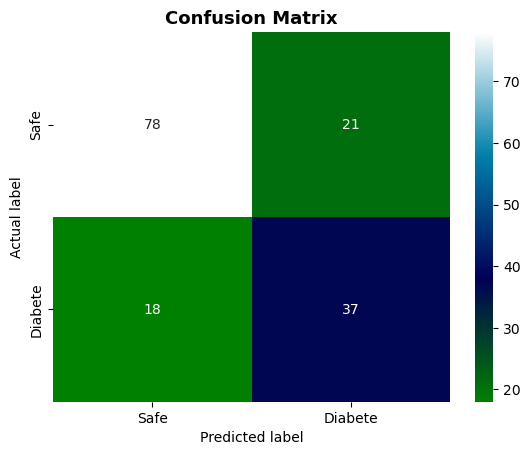

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

ax = plt.subplot()

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='ocean')
ax.xaxis.set_ticklabels(['Safe', 'Diabete']); 
ax.yaxis.set_ticklabels(['Safe', 'Diabete']);

plt.tight_layout

plt.title("Confusion Matrix", fontsize=13, fontweight='bold')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")